<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Salgado
- Nombre de alumno 2: Sebastián Urbina


### **Link de repositorio de GitHub:** https://github.com/SebasUrbina/MDS7202

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('recursos/diabetes_data.csv.zip')
df.head(4)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0

## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

In [2]:
# !pip install xgboost

In [52]:
# Informacion general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
# Revisamos NAs
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [4]:
# Vemos estadísticas
df.describe()

Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914      0.456924      0.487345   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      1.000000      1.000000   
75%        1.000000              0.000000      1.000000      1.000000   
max        1.000000              1.000000      1.000000      1.000000   

            Veggies  HvyAlcoholConsump       GenHlth      MentHlth  \
count  70692.000000       70692.000000  70692.000000  70692.000000   
mean       0.788774           0.042721      2.837082      3.752037   
std        0.408181           0.202228      1.113565      8.155627   
min        0.000000           0.000000      1.000000      0.000000   
25%        1.000000           0.000000      2.000000      0.000000   
50%        1.000000           0.000000      3.000000      0.000000   
75%        1.000000           0.000000      4.000000      2.000000   
max        1.000000           1.000000      5.000000     30.000000   

           PhysHlth      DiffWalk        Stroke        HighBP      Diabetes  
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000  
mean       5.810417      0.252730      0.062171      0.563458      0.500000  
std       10.062261      0.434581      0.241468      0.495960      0.500004  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      1.000000      0.500000  
75%        6.000000      1.000000      0.000000      1.000000      1.000000  
max       30.000000      1.000000      1.000000      1.000000      1.000000

In [5]:
df.head()

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0  
4       0.0       0.0     0.0     0.0       0.0

In [6]:
# Separamos las features del target
features = df.drop(columns=['Diabetes']) 
labels = df['Diabetes']

<Axes: >

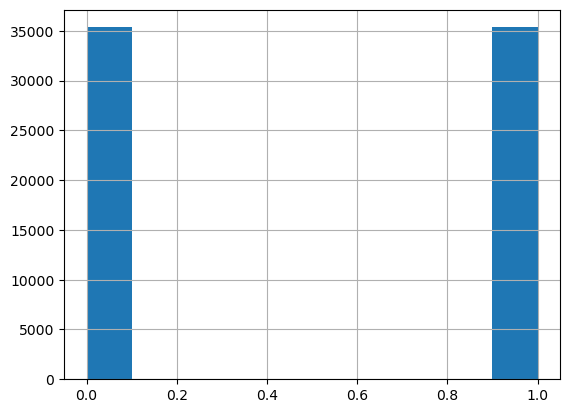

In [7]:
# Vemos el balance de clases
labels.hist()

    Notamos que las clases están balanceadas, lo cual es excelente :)

    A continuación vemos las distribuciones de las variables en nuestro DataFrame.

In [8]:
import plotly.express as px

# Graficar la distribución de las columnas
for columna in features.columns:
    fig = px.histogram(features, x=columna, marginal='box')
    fig.show()

Se puede observar en general la presencias de bastantes variables categóricas. Si nos fijamos en las continuas, podemos notar que `BMI` distribuye normal y presenta bastante outliers. De manera similar pasa con `MentHlth` y `PhysHlth`, las cuales presentan bastantes outliers. El resto de variables son esencialmente categóricas.

Lo que haremos será aplicar **RobustScaler** a las columnas ``BMI``, ``MenthHlth`` y ``PhysHlth``.

A continuación separamos en conjuntos de train y test. Dejamos el 30% para test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    shuffle=True, 
                                                    stratify=labels,
                                                    test_size=0.3,
                                                    random_state=10)

In [10]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix



# Creamos el Pipeline
pipe = Pipeline(
    [('Preprocesamiento',
      ColumnTransformer([
          ('RobustScaler', RobustScaler() , ['BMI','MentHlth','PhysHlth']),
          ], remainder='passthrough')),
    ('XGBoost', 
     xgb.XGBClassifier(random_state=44))
     ])
    
pipe.set_output(transform="pandas")

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('RobustScaler',
                                                  RobustScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])])),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=44, ...))])

In [11]:
# Entrenamos
pipe.fit(X_train, y_train.ravel())

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('RobustScaler',
                                                  RobustScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])])),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=44, ...))])

In [12]:
# Predecimos 

y_pred = pipe.predict(X_test)

In [13]:
# reporte de clasificación
print('Matriz de confusión\n')
print(confusion_matrix(y_test, y_pred))
print('\nReporte de Clasificación\n')
print(classification_report(y_test, y_pred))

Matriz de confusión

[[7376 3228]
 [2195 8409]]

Reporte de Clasificación

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10604
         1.0       0.72      0.79      0.76     10604

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



El modelo logra un desempeño razonablemente bueno. Con un Accuracy del 74%, es decir, del total de datos, un 74% de estos fueron clasificados correctamente. 

Cabe decir que esta métrica y las demás que muestra el reporte, como Precision, Recall y F1 score, solo miden el desempeño de la predicción, habría que aplicar otros métodos e y generar otros indicadores para interpretar la influencia de cada variable explicativa sobre el atributo `Diabetes`. 

En ese sentido, un modelo con buenas métricas de predicción no necesariamente significa una buena u óptima selección de características, podría ser el caso como también podría no serlo. Ya que estos indicadores no están directamente relacionados a definir el set óptimo. Por otro lado, un modelo con buen desempeño predictivo probablemente cuenta con las variables explicativas importantes para la definición de la variable objetivo, sin embargo, también puede contener otros atributos que no necesariamente son relevantes al problema. Es por esto que es necesario complementar estos resultados con técnicas y cifras relacionadas a la interpretabilidad.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [14]:
clf = pipe['XGBoost']

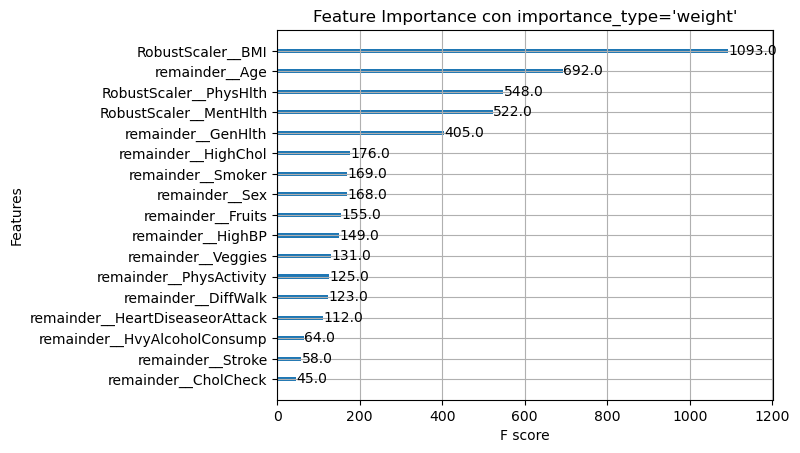

In [15]:
# Inserte su código aquí
xgb.plot_importance(clf, max_num_features=20)
plt.title("Feature Importance con importance_type='weight'")
plt.show()

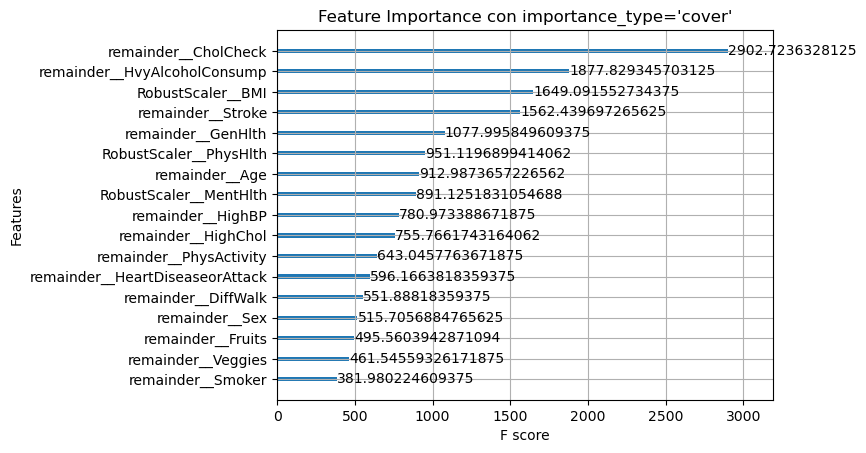

In [16]:
xgb.plot_importance(clf, max_num_features=20, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

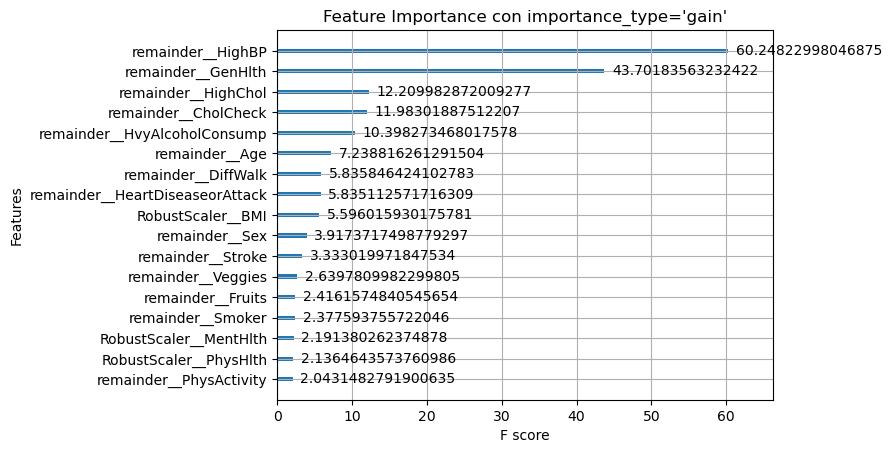

In [17]:
xgb.plot_importance(clf, max_num_features=20, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

    Los resultados obtenidos con los diferentes métodos de importancia en XGBoost no siempre son directamente comparables, ya que cada método evalúa la importancia de las características desde una perspectiva diferente. Sin embargo, pueden proporcionar una idea general de qué características son consideradas importantes por el modelo.

    En cuanto a la interpretabilidad de un modelo basado en árboles, las importancias de las características proporcionadas por métodos como weight, cover y gain pueden ser útiles para entender qué características están siendo consideradas relevantes para tomar decisiones de predicción. Estas importancias permiten identificar las características más influyentes en el modelo y brindan información sobre cómo se están utilizando para hacer predicciones.

    Respecto a si las importancias son suficientes, es importante que comprender un modelo de árboles no se limita únicamente a las importancias de las características La estructura del árbol, las reglas de división y otros factores también son relevantes para comprender cómo el modelo realiza sus predicciones. Además, la interpretabilidad puede ser más desafiante a medida que el modelo se vuelve más complejo con múltiples árboles y características interdependientes.

    Una debilidad general del método de importancia de características en modelos basados en árboles es que se centra en la importancia individual de las características y puede no capturar interacciones complejas entre ellas. Algunas características pueden tener una baja importancia individual, pero desempeñar un papel crucial en combinación con otras características. 

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [18]:
from sklearn.inspection import permutation_importance
import numpy as np

In [19]:
clf = pipe
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

In [20]:
result

{'importances_mean': array([ 0.02764366,  0.00322991,  0.0099255 ,  0.00322205,  0.02995568,
        -0.00014146,  0.00455174,  0.00055011,  0.0009509 ,  0.00012102,
         0.0035144 ,  0.05474821,  0.0015403 ,  0.00142871,  0.00468534,
         0.00157488,  0.01608827]),
 'importances_std': array([0.00169969, 0.0007478 , 0.00122297, 0.00059248, 0.0014318 ,
        0.00067016, 0.00063398, 0.00049503, 0.00055739, 0.00056434,
        0.00048572, 0.00227474, 0.00071316, 0.00084866, 0.00082997,
        0.00042587, 0.00181236]),
 'importances': array([[ 2.97057714e-02,  2.69709544e-02,  2.60279140e-02,
          2.72067144e-02,  2.86212750e-02,  2.95643154e-02,
          2.84326669e-02,  2.82440588e-02,  2.85269710e-02,
          2.81026028e-02,  2.81497548e-02,  2.63108261e-02,
          2.68766503e-02,  2.77253866e-02,  2.38589212e-02,
          2.95171633e-02,  2.67823463e-02,  2.81497548e-02,
          2.64522822e-02,  2.85741230e-02,  2.82440588e-02,
          2.90927952e-02,  2.4000

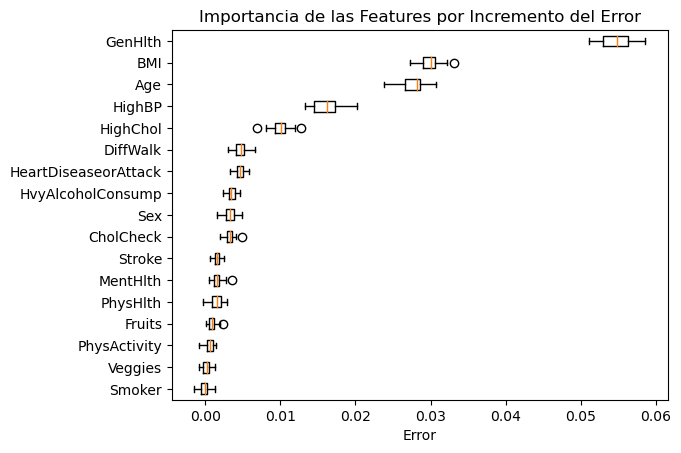

In [21]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

### Permutation Feature Importance

El método de permutación utilizado, más comúnmente conocido conocido como Permutation Feature Importance, tiene como objetivo medir el incremento del error (Feature Importance) en la predicción del modelo después de haber permutado valores en los atributos.

Exactamente, el algoritmo recibe como entrada el modelo entrenado 𝑓, la matriz de características 𝑋 y el vector objetivo 𝑦. Luego, se estima el error del modelo original $\hat{𝑒}_{orig}= 𝐿(𝑦, \hat{f}(𝑋))$ (por ejemplo, error cuadrático medio). Tras esto, para cada característica $j=1, .., k$ con $k$ el número total de variables explicativas, se realiza lo siguiente:

1. En la columna $j$ se permutan aleatoriamente los valores del atributo. Lo cual rompe la asociación entre $j$ y la variable objetivo $y$.
2. Se estima el error $𝑒 = 𝐿(𝑌 , \hat{f} (𝑋_{perm} ))$ basado en las predicciones del conjunto de datos permutado en $j$.
3. Se calcula la importancia de la característica permutada como $𝐹 𝐼_j = 𝑒_{perm}/𝑒_{orig}$ o $𝐹 𝐼_j = 𝑒_{perm}-𝑒_{orig}$.

Habiendo hecho esto para todos los atributos explicativos, se ordenan las características e orden descendente según la importancia, de manera tal que pueda ser apreciable cuáles son las variables más y menos imfluyentes en la predicción.

### Resultados

Los resultados del método arrojan que si las variables son permutadas, solo alcanzan una variación máxima en el error del modelo entre un 5% y 6%. Así que, de acuerdo al criterio de este método, ninguna variable es significativamente relevante por sí sola.

Ahora, al observar el gráfico, se puede ver que las cinco variables más importantes, en orden descendente son: `GenHlth` (Salud general), `BMI` (Índice de Masa Corporal), `Age` (Edad), `HighBP` (Alta presión arterial o hipertensión) y `HighCol` (Alto colesterol).

La influencia de las variables anteriores sobre la diabetes tiene bastante sentido. Ya que, de acuerdo a estudios médicos, la incidencia de esta enfermedad suele relacionarse a otras características de salud de la persona, como el IMC, la hipertensión y el nivel de colesteron en la sangre. Así como también se dice que el aumento de la edad se asocia a la aparición de enfermedades crónicas.

En comparación a los métodos de importancia de variables propios de XGBoost, que fueron aplicados en la parte anterior, se puede ver que todas las variables obtenidas en esta sección por la técnica de permutación, están presentes en al menos un uno de los métodos weight, cover y gain. Lo cual sustenta la importancia del resultado actual. Sin embargo, hay variables que sí fueron detectadas como importantes en la parte anterior que no fueron reconocidas de la misma forma con la permutación. Por ejemplo, `PhysHealth` (Salud física), `MentHlth` (Salud mental), `CholCheck` (Chequeo reciente de colesterol) y `HvyAlcoholConsump` (Consumo de alcohol).

Con respecto a las ventajas y desventajas del Permutation Feature Importance, éstas se explican a continuación:

Ventajas:
* La medida de importancia es fácil de interpretar, ya que es una resta de errores de dos estados del modelo.
* Permite capturar la interpretabilidad global de los atributos.
* Es comparable con distintos modelos.
* Su implementación no requiere el re-entrenamiento del modelo.

Desventajas:
* Está enlazado al error del modelo.
* Se requiere la gold label.
* Las features correlacionadas pueden generar sesgos.
* Añadir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [22]:
# !pip install shap

In [23]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [24]:
import shap

clf1 = pipe['XGBoost']
explainer = shap.TreeExplainer(clf1)
shap_values = explainer(features)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [25]:
shap_values.values

array([[ 1.3588122 , -0.22492549,  0.01072985, ..., -0.04234257,
         0.01526495,  0.4913073 ],
       [ 0.82443804,  0.15682377,  0.46471938, ..., -0.08913295,
         0.4076844 ,  0.65339386],
       [-0.30951437,  0.15497366, -0.02122381, ..., -0.01436333,
         0.01256086, -0.74769884],
       ...,
       [ 0.78922355,  0.35569313,  0.32840976, ...,  0.4932117 ,
        -0.02379225,  0.6334101 ],
       [ 0.6011192 ,  0.1451462 ,  0.26470694, ...,  0.24979948,
        -0.02251054,  0.741476  ],
       [ 0.10300997,  0.11049373, -0.0340009 , ..., -0.14447471,
        -0.0271236 ,  0.6313204 ]], dtype=float32)

Los valores negativos señalan aportes negativos para detectar el target de interés que en este caso es la prevalencia de la diabetes. Por otro lado, los positivos señalan variables que entregan un aporte positivo a la detección de la label 1 (si el cliente presenta la enfermedad).

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

Comenzamos con la instancia 1:

In [43]:
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

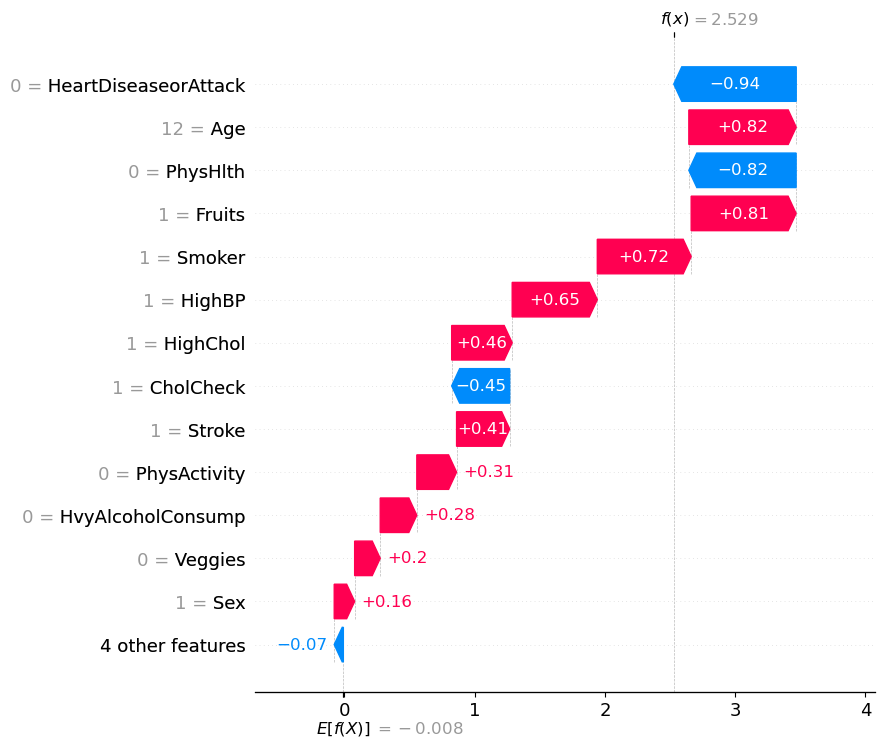

In [44]:
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

En este caso, el paciente tiene 93% de probabilidad de padecer diabetes. Las variables que más contribuyeron a subir esta probabilidad son su edad, el consumo de frutas, ser fumador, la hipertensión, el alto colesterol y haber tenido un stroke.

Mientras que las que disminuyeron este índice, son el nunca haber tenido un ataque cardiáco, la actividad física y haberse hecho controles del colesterol.

Instancia 9:

In [28]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

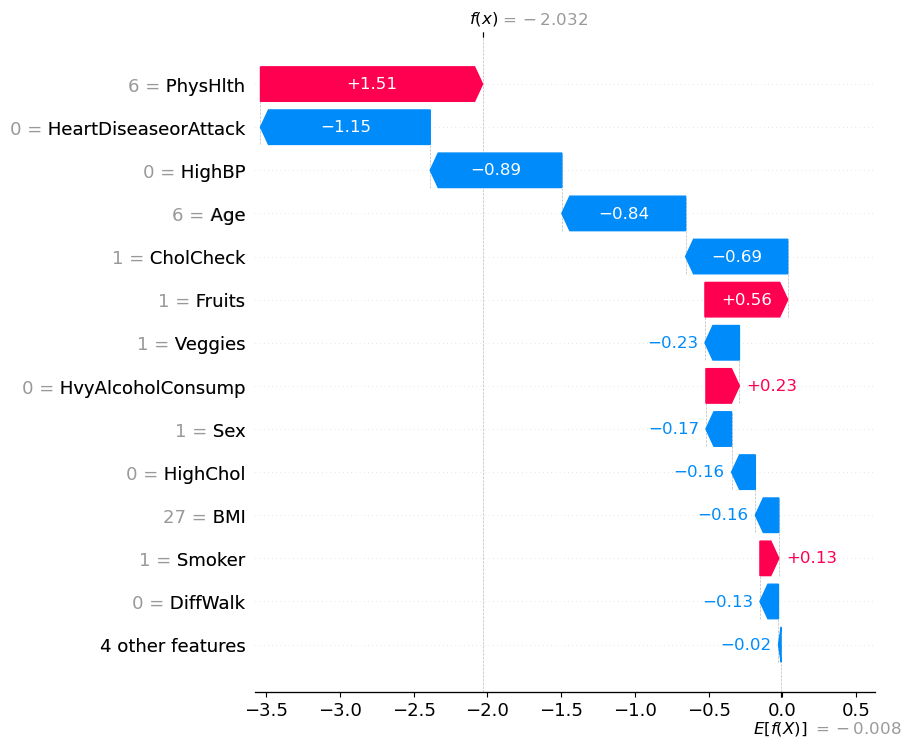

In [29]:
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

En este caso, el paciente tiene 12% de probabilidad de padecer diabetes. Las variables que más contribuyeron a subir esta probabilidad son la mala salud física, el consumo de frutas y no beber alcohol regularmente.

Mientras que las que disminuyeron este índice, son el nunca haber tenido un ataque cardiáco, no tener colesteron alto, controlar su colesterol y el consumo de verduras.

Instancia 150:

In [30]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

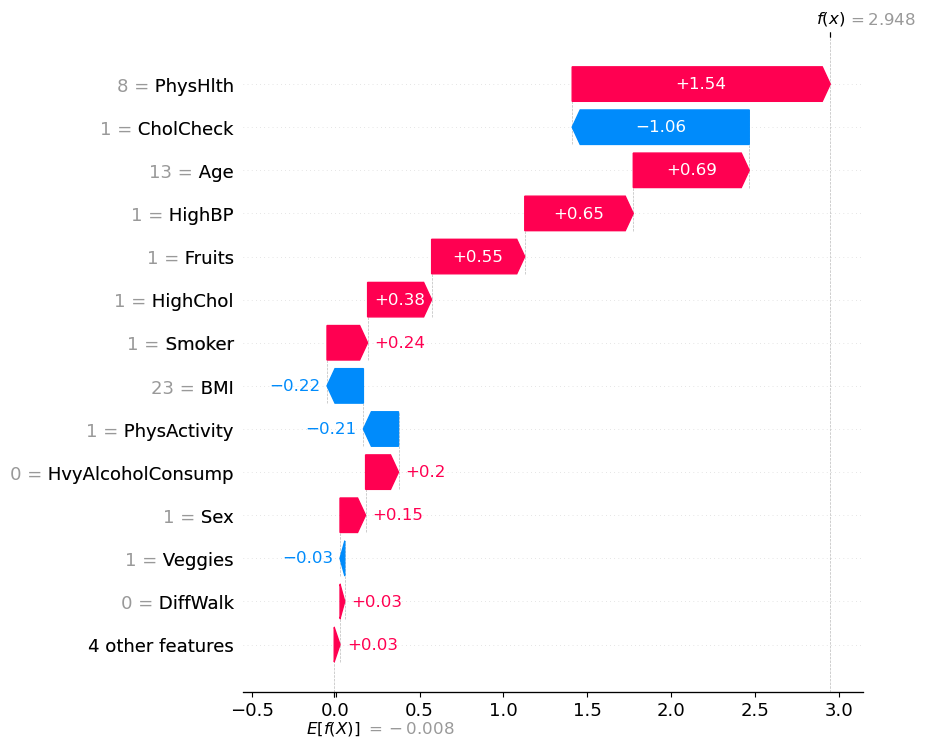

In [31]:
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

En este caso, el paciente tiene 95% de probabilidad de padecer diabetes. Las variables que más contribuyeron a subir esta probabilidad son la mala salud física, la edad, la presión arterial alta, el consumo de frutas y el colesterol alto.

Mientras que las que disminuyeron este índice, son el chequeo regular del colesterol, el índice de masa corporal y la actividad física.

El patrón común en las instancias se da en que el haber presentado un ataque cardiáco con anterioridad, una mala salud física, la edad avanzada, la alta presión arterial, el colesterol alto y el consumo de frutas, afectan positivamente al riesgo de diabetes.

De todas maneras, el análisis de tres instancias particulares no sería suficiente para generalizar a todos los datos. Además, en las instancias se da que no todas las variables son igual de importantes entre pacientes. Por ejemplo, para un paciente la variable de ataque cardiaco es la más importante pero para otro paciente lo es la salud física.

Por lo tanto, se recomienda el uso de técnicas de interpretabilidad global.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

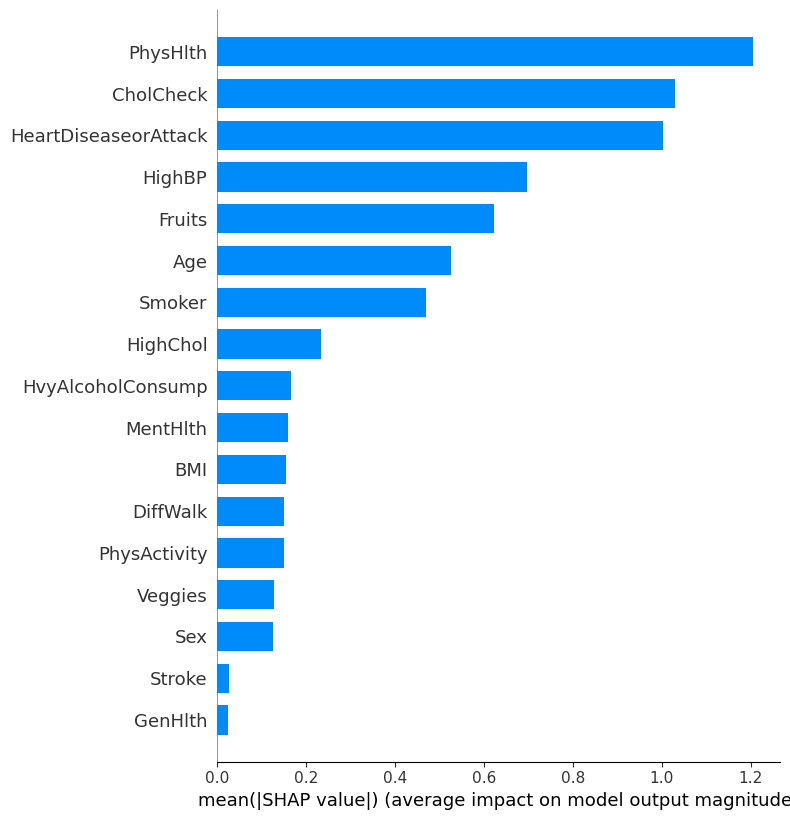

In [32]:
shap.summary_plot(shap_values, features, plot_type="bar")

De acuerdo a los resultados globales, se da que las variables que más afectan la incidencia de diabetes son, en orden descendiente de importancia, una mala salud física, el chequeo regular del colesterol, el haber sufrido un ataque cardiáco anteriormente, el consumo de frutas, la edad y ser fumador.

En general, se da que las variables importantes a nivel de instancia coinciden con las que se tienen en el resultado global.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [33]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

In [34]:
feature_importance_names

Index(['PhysHlth', 'CholCheck', 'HeartDiseaseorAttack', 'HighBP', 'Fruits',
       'Age', 'Smoker', 'HighChol', 'HvyAlcoholConsump', 'MentHlth', 'BMI',
       'DiffWalk', 'PhysActivity', 'Veggies', 'Sex', 'Stroke', 'GenHlth'],
      dtype='object')

In [35]:
shap_values[:,'PhysHlth']

.values =
array([ 2.2019408, -0.8236676,  1.783336 , ..., -0.7793322, -1.5144053,
       -1.0741239], dtype=float32)

.base_values =
array([-0.00841079, -0.00841079, -0.00841079, ..., -0.00841079,
       -0.00841079, -0.00841079], dtype=float32)

.data =
array([30.,  0., 10., ...,  0.,  0.,  0.])

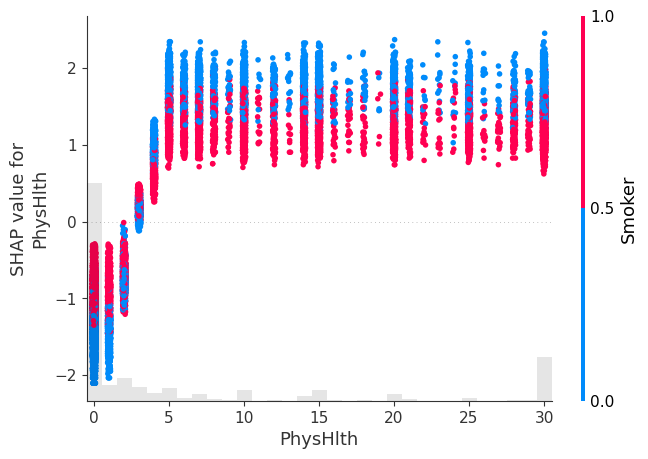

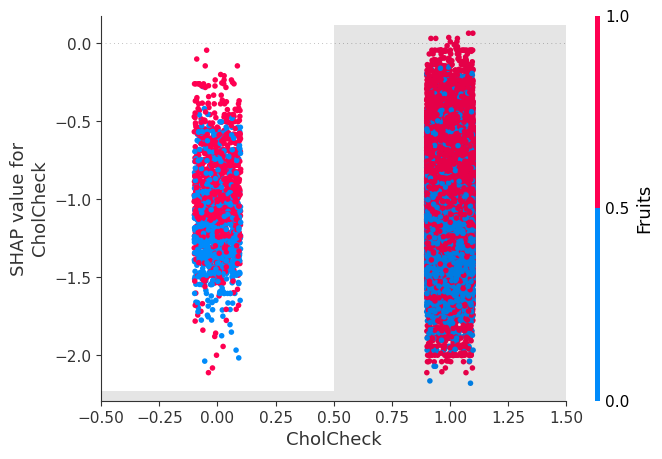

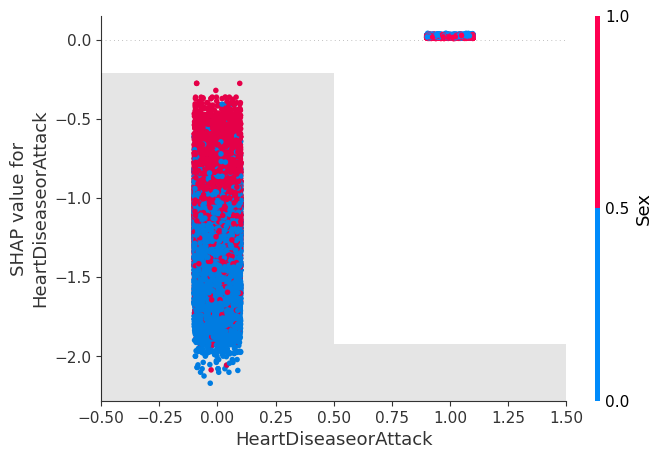

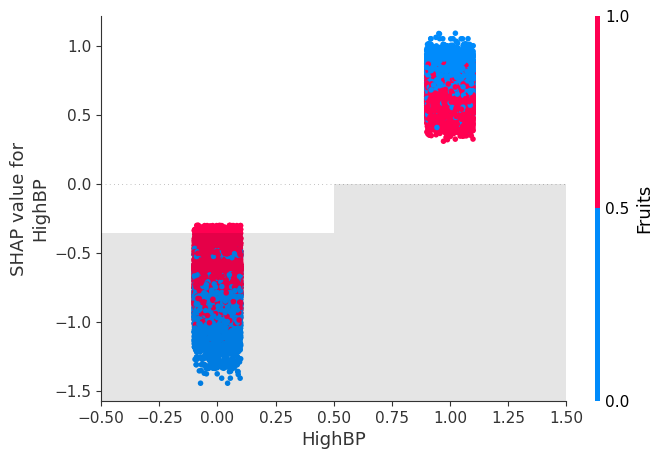

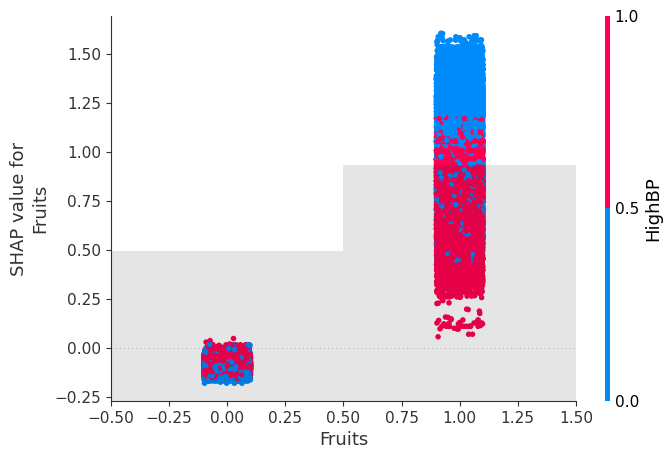

In [36]:
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], 
                   color=shap_values)

La interpretación se separará por cada variable graficada:

* `PhysHlth`: Haber tenido menos de cuatro días cuando se sufrió una herida o enfermedad física dentro del último mes, representa una disminución en el riesgo de diabetes. Mientras que si estos padecimientos físicos superan los cuatro días, esto afecta positivamente al riesgo de diabetes.

* `CholCheck`: Por el histograma superpuesto en el gráfico, se observa que la mayoría de los pacientes se han realizado chequeos del colesterol con respecto a los que no lo hacen. Esto puede afectar a que independiente de que el paciente se controle o no, esta variable va a representar un riesgo menor de diabetes.

* `HeartDiseaseorAttack`: Se ve que haber tenido un ataque cardiáco, representa un aumento en la probabilidad de diabetes.

* `HighBP`: La presión arterial alta significa un aumento en la probabilidad de padecer diabetes.

* `Fruits`: Consumir frutas representa un aumento en la probabilidad de tener diabetes.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

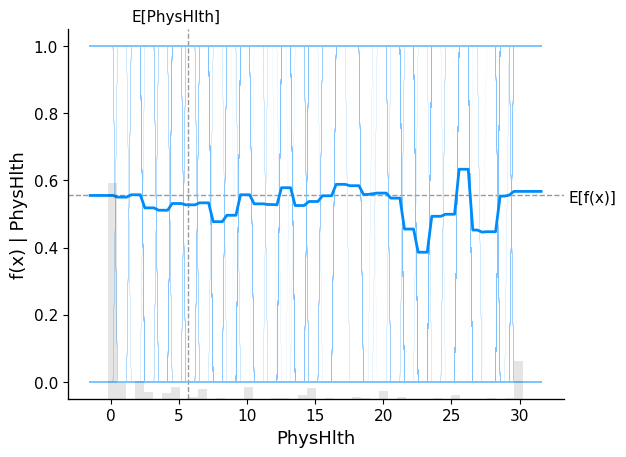

In [47]:
X1000 = shap.utils.sample(features, 1000)

# sample_ind = 1
shap.partial_dependence_plot(
    'PhysHlth', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True
)

Vemos que la probabilidad esperada para todo estado de salud física, se mueve entre el 40% y 65%. Y la tendencia se ve relativamente constante, es decir, en la medida que empeora la salud física o mayor es la cantidad de días en los que la persona tuvo una mala salud desde la perspectiva física, la probabilidad de padecer diabetes parece concentrarse en el 55%.

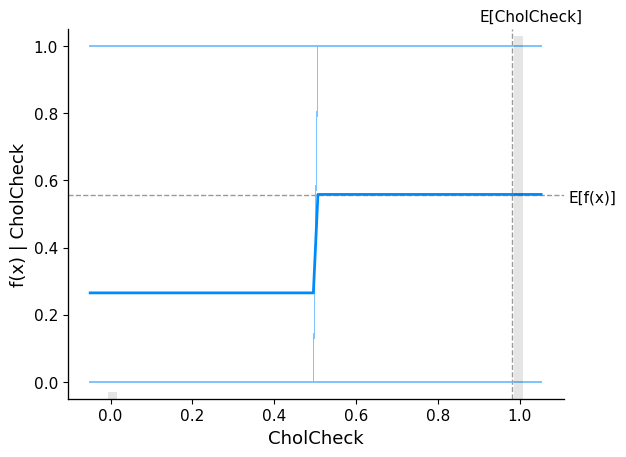

In [48]:
# sample_ind = 1
shap.partial_dependence_plot(
    'CholCheck', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    # shap_values=shap_values[sample_ind:sample_ind+1,:]
)

En este caso, se ve que la probabilidad esperada para aquellos pacientes que no chequean su colesterol es del 25%, aproximadamente. Mientras que la probabilidad de padecer diabetes para los pacientes que sí controlan su nivel de colesterol, está alrededor del 55%. Esto no tiene mucho sentido, ya que se esperaría que el control del colesterol tenga un efecto positivo en la salud de la persona. Esto pudo haber sido efecto del desbalance que existe en los datos con respecto a esta categoría, ya que la mayoría de los pacientes sí controla su colesterol, o sea, la mayoría de los datos tienen esta característica, entonces, puede que no sea una variable muy informativa.

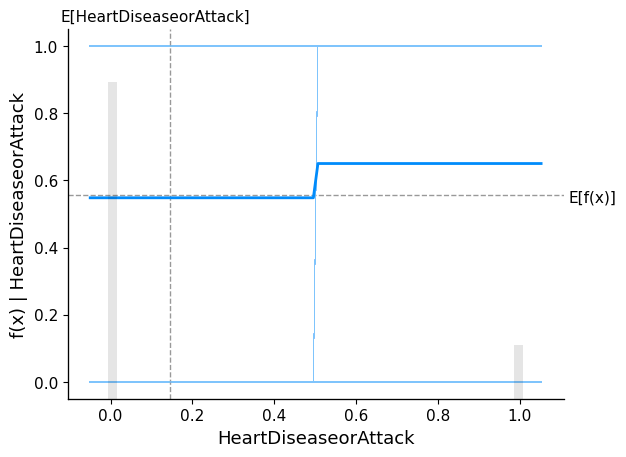

In [49]:
# sample_ind = 1
shap.partial_dependence_plot(
    'HeartDiseaseorAttack', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    # shap_values=shap_values[sample_ind:sample_ind+1,:]
)

De acuerdo al gráfico, se ve que el no haber padecido un ataque cardiaco con anterioridad, significa una probabilidad esperada de riesgo de diabetes del 55%, aproximadamente. Mientras que para aquellos pacientes que sí han sufrido algún ataque de este tipo, la probabilidad de riesgo asciende a cerca del 75%.

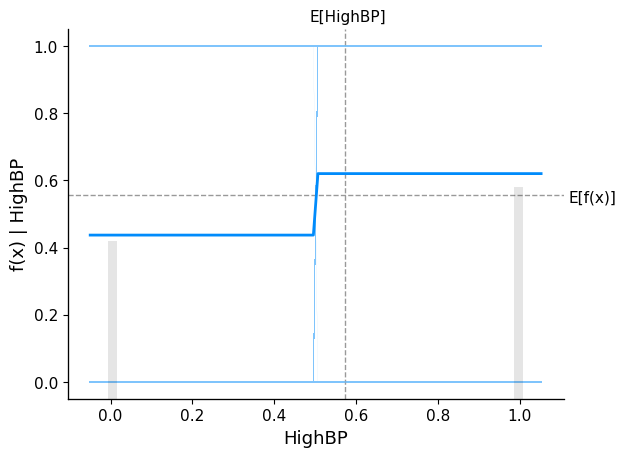

In [50]:
# sample_ind = 1
shap.partial_dependence_plot(
    'HighBP', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    # shap_values=shap_values[sample_ind:sample_ind+1,:]
)

Tener una presión arterial baja o normal, representa un riesgo esperado de diabetes cercano al 45%. Mientras que si el paciente presenta hipertensión arterial, la probabilidad esperada de padecer diabetes asciende al 60%, aproximadamente.

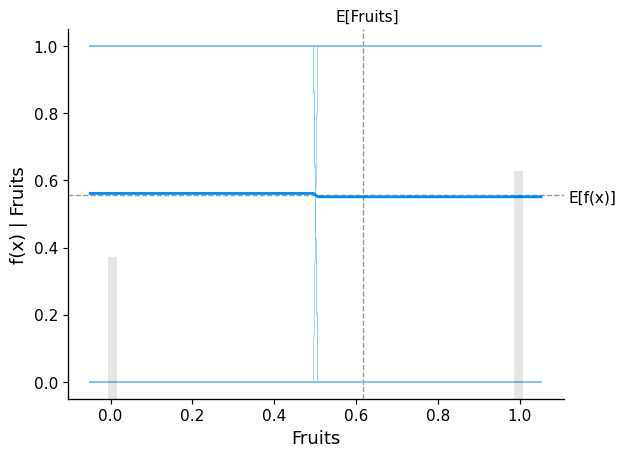

In [51]:
# sample_ind = 1
shap.partial_dependence_plot(
    'Fruits', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    # shap_values=shap_values[sample_ind:sample_ind+1,:]
)

Si se estudia el PDP con respecto al consumo de frutas, se puede ver que independiente de si el paciente consume o no frutas, la probabilidad esperada de contraer diabetes está alrededor del 55%.

Para el análisis anterior se tomó una muestra de 1000 datos, y considerando que se tienen registros de un total de 70692 pacientes, realmente se estudió un 1.41% de los datos. Así que estos resultados no podrían ser generalizables para todo el conjunto de datos.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [35]:
!pip install alibi

     ---------------------------------------- 0.0/524.0 kB ? eta -:--:--
     ----------- -------------------------- 153.6/524.0 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 524.0/524.0 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ----- ---------------------------------- 0.9/7.2 MB 28.7 MB/s eta 0:00:01
     -------------- ------------------------- 2.5/7.2 MB 32.4 MB/s eta 0:00:01
     --------------------------- ------------ 4.9/7.2 MB 35.0 MB/s eta 0:00:01
     ---------------------------------------  7.2/7.2 MB 41.6 MB/s eta 0:00:01
     ---------------------------------------- 7.2/7.2 MB 35.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ----------- ---------------------------- 2.0/7.0 MB 63.4 MB/s eta 0:00:01
     ---------------------- ----------------- 4.0/7.0 MB 50.4 MB/s eta 0:00:01
     ------------------------------------ --- 6.3/7.0 MB 50.6 MB/s eta 0

In [36]:
from alibi.explainers import AnchorTabular

In [37]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>